In [1]:
#notebook to produce some plots for march meeting talk

In [3]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy.ma as ma
import numpy as np
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sys.path.insert(0,"../")
import detect as dt
import glob
import gsd.hoomd
import scipy.stats
sys.path.insert(0,"../../alpha_complex_homology")
import persistence_curves as psc
sys.path.insert(0,"../../shear_movies")
#import movie_maker as mk

In [4]:
paths = ("/data1/shared/igraham/lib_persistent_homology/python_src:"
    "/data1/shared/igraham/new_lib_persistent_homology:"
    "/home1/igraham/Projects/quasilocalized_modes").split(':')
for p in paths:
    sys.path.insert(0,p)
import cell_complex_plot as cplot
import phom
import triangulation as tri

In [5]:
pjoin = os.path.join
ncat = np.concatenate

In [6]:
#old data

In [7]:
dirs = glob.glob('/data1/shared/igraham/datasets/new_memory/256.0?.04/')

In [8]:
dirs

['/data1/shared/igraham/datasets/new_memory/256.01.04/',
 '/data1/shared/igraham/datasets/new_memory/256.02.04/',
 '/data1/shared/igraham/datasets/new_memory/256.03.04/',
 '/data1/shared/igraham/datasets/new_memory/256.04.04/',
 '/data1/shared/igraham/datasets/new_memory/256.05.04/',
 '/data1/shared/igraham/datasets/new_memory/256.06.04/',
 '/data1/shared/igraham/datasets/new_memory/256.07.04/',
 '/data1/shared/igraham/datasets/new_memory/256.08.04/',
 '/data1/shared/igraham/datasets/new_memory/256.09.04/']

In [6]:
#time to memory across

In [71]:
#t1s approaching memory
def grab_count_t1s_nc(trajs, limit=-1, max_back=10, length=(0,np.inf), step=4, buffer=(0,0), min_dat=np.inf):
    
    crev = [[] for i in range(max_back)]
    cirrev = [[] for i in range(max_back)]
    
    count = 0
    for idx, t in enumerate(trajs):
        if count >= limit:
            break
        g2 = glob.glob(t+"/other/t1/*_t1s.npz")
        l = len(g2)//4
        if l < length[0] or l > length[1]:
            continue
        try:
            sorter = [int(g.split('/')[-1].replace("_t1s.npz","")) for g in g2]
            nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        except:
            print('badbadnotgood')
            continue
        # if state falls into memory too early or too late, skip
        looper = ng2[::-step][:max_back]
        if step > 0:
            fl = len(looper) - l -1 + buffer[0]
            ml = len(looper) - buffer[1]
        else:
            fl = buffer[0]
            ml = l - buffer[1]
        ok = False
        for jdx, g in enumerate(looper):
            if fl > jdx:
                continue
            elif ml <= jdx:
                continue
            ok = True
            a = np.load(g)
            rev = len(a['rev'])
            irrev = len(a['irrev'])
            crev[jdx].append(rev)
            cirrev[jdx].append(irrev)
        if ok:
            count += 1
    print(count)
    tmp = [len(l) for l in crev]
    print(tmp)
    rev = np.zeros((max_back))
    irrev = np.zeros((max_back))
    for i in np.arange(max_back):
        if len(crev[i]) < min_dat:
            #crev[i].append(1)
            rev[i] = np.nan#np.mean(crev[i])
        else:
            rev[i] = np.mean(crev[i])
        if len(cirrev[i]) < min_dat:
            #cirrev[i].append(0)
            irrev[i] = np.nan#np.mean(cirrev[i])
        else:
            irrev[i] = np.mean(cirrev[i])
    del crev
    del cirrev
    return rev, irrev

def grab_count_t1s_gamma_nc(dirs, limit=-1, max_back=40, step=1, length=(0,np.inf), buffer=(0,0), min_dat=np.inf):
    
    crev = []
    cirrev = []
    
    labels = []
    
    for d in dirs:
        print(d)
        label=d.strip('/').split('/')[-1]
        labels.append(label)
        trajs = glob.glob(pjoin(d,'*[!.nc]'))
        rev, irrev = grab_count_t1s_nc(trajs, limit=limit, max_back=max_back, 
                                       length=length, step=step, buffer=buffer, min_dat=min_dat)
        crev.append(rev)
        cirrev.append(irrev)
    
    return crev, cirrev, labels
        

In [86]:
dirs = glob.glob('/data1/shared/igraham/datasets/new_memory/256.0?.04')
ml = 10
revs2, irrevs2, labels4 = grab_count_t1s_gamma_nc(dirs, limit=1500, max_back=ml, step=4, buffer=(0,1), min_dat=50)

/data1/shared/igraham/datasets/new_memory/256.01.04
1500
[1500, 770, 88, 6, 0, 0, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.02.04
1500
[1500, 1151, 302, 41, 3, 0, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.03.04
1500
[1500, 1317, 439, 99, 19, 3, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.04.04
1500
[1500, 1411, 725, 242, 65, 10, 1, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.05.04
1500
[1500, 1446, 871, 383, 172, 62, 25, 6, 3, 0]
/data1/shared/igraham/datasets/new_memory/256.06.04
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
1051
[1051, 1025, 732, 433, 249, 129, 71, 40, 16, 0]
/data1/shared/igraham/datasets/new_memory/256.07.04
1500
[1500, 1487, 1239, 894, 611, 430, 297, 193, 129, 0]
/data1/shared/igraham/datasets/new_memory/256.08.04
1492
[1492, 1486, 1336, 1118, 937, 751, 595, 499, 391, 0]
/da

In [75]:
revs3, irrevs3, labels_rir5 = grab_count_t1s_gamma_nc(dirs, limit=1500, max_back=ml, step=-4, buffer=(0,2), min_dat=50)

/data1/shared/igraham/datasets/new_memory/256.01.04
136
[136, 9, 0, 0, 0, 0, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.02.04
428
[428, 60, 5, 0, 0, 0, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.03.04
1500
[1500, 342, 65, 12, 4, 0, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.04.04
947
[947, 307, 79, 14, 4, 1, 0, 0, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.05.04
1500
[1500, 677, 294, 104, 42, 12, 6, 3, 0, 0]
/data1/shared/igraham/datasets/new_memory/256.06.04
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
badbadnotgood
733
[733, 433, 249, 129, 71, 40, 16, 8, 5, 1]
/data1/shared/igraham/datasets/new_memory/256.07.04
1351
[1351, 990, 682, 476, 328, 206, 138, 87, 61, 39]
/data1/shared/igraham/datasets/new_memory/256.08.04
1336
[1336, 1119, 937, 751, 596, 499, 391, 316, 256, 215]
/data1/shared/igraham/datasets/new_mem

In [213]:
irrevs2

[array([63.32, 59.77, 59.26, 55.1 , 58.19, 56.43, 54.53, 35.44,  0.53])]

In [214]:
tmp = np.array(revs[1:]).T
plt.plot(np.array(irrevs[1:]).T/tmp)

NameError: name 'revs' is not defined

Text(40, 40, 'time')

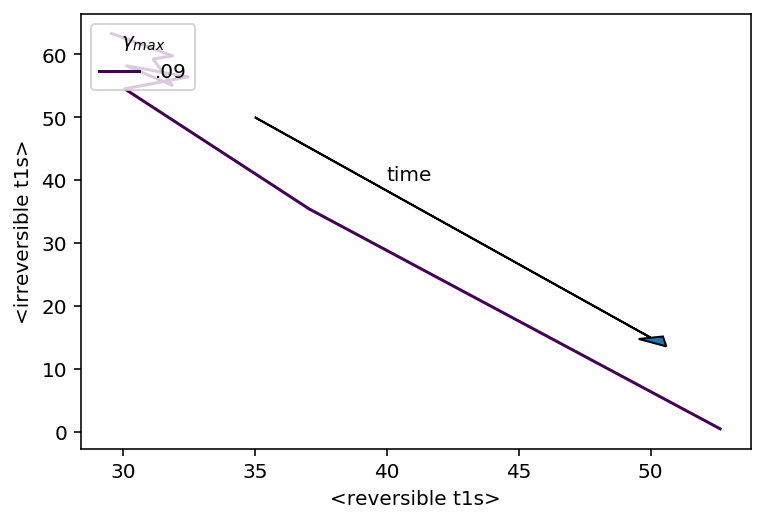

In [215]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(revs2)-1)
for idx, (r, i, lab) in enumerate(zip(revs2, irrevs2, labels4)):
    l = '.'+lab.split('.')[-2]
    plt.plot(r, i, label=l, color=cmap(norm(idx)))
plt.legend(title=r"$\gamma_{max}$", loc="upper left")
plt.ylabel("<irreversible t1s>")
plt.xlabel("<reversible t1s>")
plt.arrow(35,50,15,-35,width=.01, head_width=1)
plt.text(40,40,"time")

Text(40, 40, 'time')

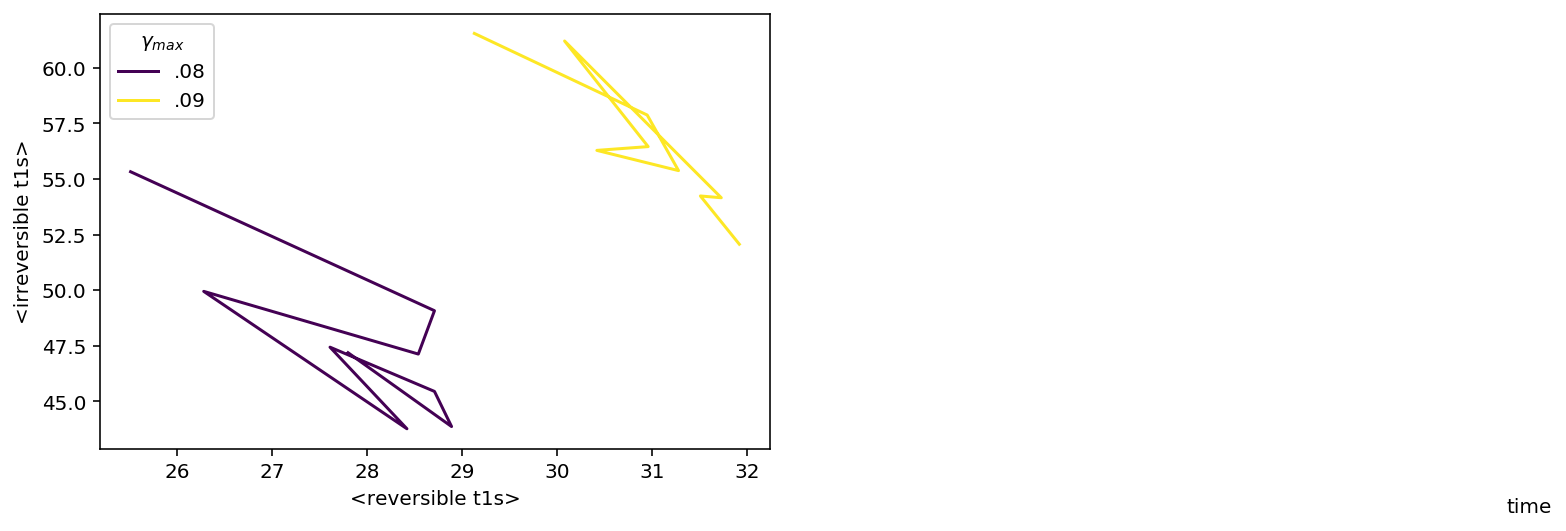

In [206]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(revs2)-1)
for idx, (r, i, lab) in enumerate(zip(revs2, irrevs2, labels4)):
    l = '.'+lab.split('.')[-2]
    plt.plot(r, i, label=l, color=cmap(norm(idx)))
plt.legend(title=r"$\gamma_{max}$", loc="upper left")
plt.ylabel("<irreversible t1s>")
plt.xlabel("<reversible t1s>")
plt.arrow(35,50,15,-35,width=.01, head_width=1)
plt.text(40,40,"time")

In [83]:
irrevs2[-2]

array([ 1.79691689,  2.03230148, 33.97979042, 46.00536673, 46.86446105,
       47.29294274, 48.88403361, 48.44689379, 47.84398977,         nan])

(0, 0.9)

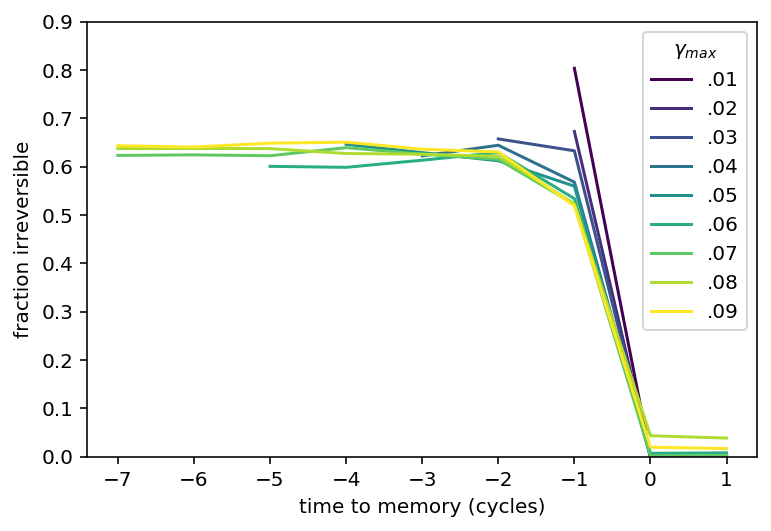

In [87]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(revs2)-1)
for idx, (r, i, lab) in enumerate(zip(revs2, irrevs2, labels4)):
    #print(i)
    l = '.'+lab.split('.')[-2]
    plt.plot(-1*np.arange(len(i))+1, i/(i+r), label=l, color=cmap(norm(idx)))
plt.legend(title=r"$\gamma_{max}$", loc="upper right")
plt.ylabel("fraction irreversible")
plt.xlabel("time to memory (cycles)")
#plt.arrow(35,50,15,-35,width=.01, head_width=1)
#plt.text(40,40,"time")
#plt.xscale('log')
plt.ylim(0,.9)

In [61]:
revs3

[array([3.75      , 4.54      , 3.71428571,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]),
 array([ 7.06      ,  9.01234568,  8.375     , 10.2       , 10.        ,
                nan,         nan,         nan,         nan,         nan]),
 array([10.98      , 13.39772727, 12.62962963, 15.        ,         nan,
                nan,         nan,         nan,         nan,         nan]),
 array([14.14      , 16.97894737, 17.08      , 19.        , 17.5       ,
                nan,         nan,         nan,         nan,         nan]),
 array([16.88      , 20.82105263, 21.05454545, 22.57142857, 23.18181818,
        30.2       ,         nan,         nan,         nan,         nan]),
 array([20.93      , 24.95959596, 27.07462687, 27.1       , 29.        ,
        26.625     , 27.16666667, 29.33333333, 18.        , 25.        ]),
 array([23.84      , 27.47474747, 28.90123457, 30.21666667, 27.51162791,
        27.73333333, 25.56521739, 28.        , 27

(0, 0.9)

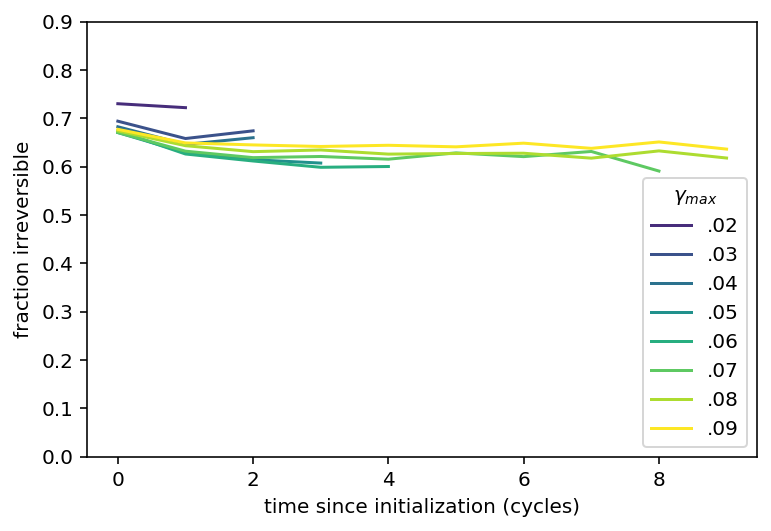

In [81]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(revs3)-1)
for idx, (r, i, lab) in enumerate(zip(revs3, irrevs3, labels_rir5)):
    if idx == 0:
        continue
    #print(i)
    l = '.'+lab.split('.')[-2]
    plt.plot(np.arange(len(i)), i/(i+r), label=l, color=cmap(norm(idx)))
plt.legend(title=r"$\gamma_{max}$", loc="lower right")
plt.ylabel("fraction irreversible")
plt.xlabel("time since initialization (cycles)")
#plt.arrow(35,50,15,-35,width=.01, head_width=1)
#plt.text(40,40,"time")
#plt.xscale('log')
plt.ylim(0,.9)

In [142]:
plt.text?

In [90]:
#new bd persistence curves
def grab_persistence_bd_nc(trajs, points=np.linspace(-.5,1.5,101), limit=-1, max_back=5, length=(0,np.inf), step=4):
    bds = [[] for _ in range(max_back)]
    count = 0
    for idx, t in enumerate(trajs):
        if count == limit:
            break
        
        g2 = glob.glob(t+"/other/phom/*_bd.npz")
        
        l = len(g2)//4
        if l < length[0] or l > length[1]:
            continue
        sorter = [int(g.split('/')[-1].replace("_bd.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        l = len(nsort)
        #if l-2 < max_back:
        #    continue
        for jdx, g in enumerate(ng2[::-step][:max_back]):
            bds[jdx].append(np.load(g)['bd'])
        count += 1
    print(count)
    
    bettis = []
            
    for bd in bds:
        if bd == []:
            bettis.append(None)
        else:
            div = len(bd)
            tmp = np.concatenate(bd)
            tmp = tmp[tmp[:,0] != -1]
            points, tmp2 = psc.sum_persistence_func(tmp[:,0], tmp[:,1], psc.pc_b, points=points, os=0)
            bettis.append(tmp2/div)
        
    return bettis

def grab_other_persistence_bd_nc(trajs, points=np.linspace(-.5,1.5,101), limit=-1, max_forward=5, length=(0,np.inf), step=4):
    bds = [[] for _ in range(max_forward)]
    count = 0
    for idx, t in enumerate(trajs):
        if count == limit:
            break
        g2 = glob.glob(t+"/other/phom/*_bd.npz")
        sorter = [int(g.split('/')[-1].replace("_bd.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        l = len(nsort)
        if l-2 < max_forward:
            continue
        for jdx, g in enumerate(ng2[::4][:max_forward]):
            bds[jdx].append(np.load(g)['bd'])
        count += 1
    print(count)
            
    bettis = []
            
    for bd in bds:
        if bd == []:
            bettis.append(None)
        div = len(bd)
        tmp = np.concatenate(bd)
        tmp = tmp[tmp[:,0] != -1]
        points, tmp2 = psc.sum_persistence_func(tmp[:,0], tmp[:,1], psc.pc_b, points=points, os=0)
        bettis.append(tmp2/div)
        
    return bettis


def grab_frame_persistence_bd_nc(trajs, frame=0, points=np.linspace(-.5,1.5,101), limit=-1):
    bd = []
    for idx, t in enumerate(trajs):
        if idx == limit:
            break
        g2 = glob.glob(t+"/other/phom/*_bd.npz")
        sorter = [int(g.split('/')[-1].replace("_bd.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        l = len(nsort)
        bd.append(np.load(ng2[frame])['bd'])
            
    bettis = []
            
    #for bd in bds:
    if bd == []:
        bettis.append(None)
    div = len(bd)
    tmp = np.concatenate(bd)
    tmp = tmp[tmp[:,0] != -1]
    points, tmp2 = psc.sum_persistence_func(tmp[:,0], tmp[:,1], psc.pc_b, points=points, os=0)
    bettis.append(tmp2/div)
        
    return bettis
            
def grab_persistence_bd_gamma_nc(dirs, limit=-1, max_back=5):
    
    bettis = []
    
    labels = []
    
    for d in dirs:
        print(d)
        label=d.strip('/').split('/')[-1]
        labels.append(label)
        trajs = glob.glob(pjoin(d,'*[!.nc]'))
        betti = grab_persistence_bd_nc(trajs, limit=limit, max_back=max_back)
        bettis.append(betti)
    
    return bettis, labels
        

In [92]:
trajs = glob.glob('/data1/shared/igraham/datasets/new_memory/256.05.04/*[!.nc]')

In [236]:
bet = grab_persistence_bd_nc(trajs, limit=150, max_back=ml, length=(ml,ml), step=-4)

150


In [101]:
mq = 4
bet = grab_persistence_bd_nc(trajs, limit=100, max_back=mq, length=(mq,mq), step=-4)

100


In [94]:
bet_forward = grab_other_persistence_bd_nc(trajs[:1000], max_forward=20)

In [69]:
bet_init = grab_frame_persistence_bd_nc(trajs[:1000])

In [70]:
bet_final = grab_frame_persistence_bd_nc(trajs[:1000], frame=-1)

In [97]:
len(bet)

4

In [73]:
bet_init

[array([8.00000e-03, 2.50000e-02, 1.07000e-01, 3.64000e-01, 1.05500e+00,
        2.45900e+00, 4.85800e+00, 8.44700e+00, 1.35410e+01, 2.04690e+01,
        3.03460e+01, 4.57940e+01, 6.84750e+01, 9.68140e+01, 1.28879e+02,
        1.63497e+02, 2.03011e+02, 2.47561e+02, 2.93806e+02, 3.36237e+02,
        3.71444e+02, 3.98568e+02, 4.17953e+02, 4.31905e+02, 4.40754e+02,
        4.45399e+02, 4.46642e+02, 4.47564e+02, 4.47783e+02, 4.45937e+02,
        4.39164e+02, 4.22340e+02, 3.88978e+02, 3.36633e+02, 2.73002e+02,
        2.12127e+02, 1.63719e+02, 1.28796e+02, 1.05726e+02, 9.04840e+01,
        8.02220e+01, 7.32850e+01, 6.79310e+01, 6.36000e+01, 5.99420e+01,
        5.65200e+01, 5.32690e+01, 5.01430e+01, 4.71830e+01, 4.42450e+01,
        4.13620e+01, 3.85160e+01, 3.58250e+01, 3.31320e+01, 3.06530e+01,
        2.83120e+01, 2.59580e+01, 2.37800e+01, 2.14640e+01, 1.93330e+01,
        1.71740e+01, 1.51570e+01, 1.33310e+01, 1.15970e+01, 9.89700e+00,
        8.37500e+00, 6.99700e+00, 5.76800e+00, 4.64

In [92]:
bet

In [104]:
len(bet)

4

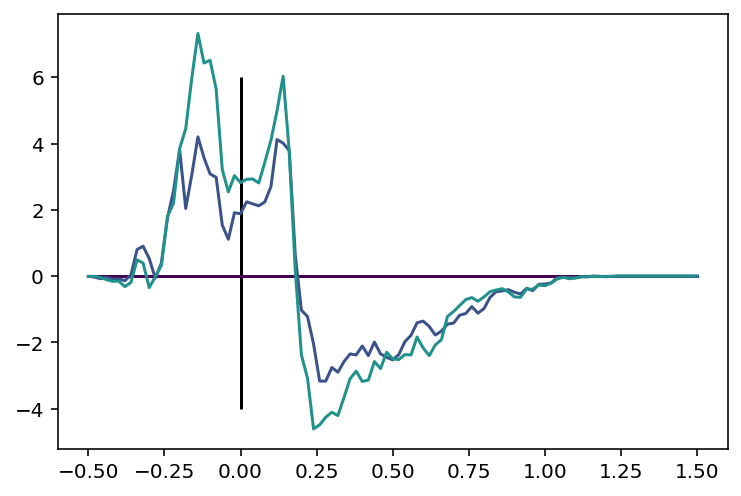

In [105]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet))
#bet = grab_persistence_bd_nc(trajs[:1])
for i, b in enumerate(bet):
    plt.plot(np.linspace(-.5,1.5,101), b-bet[0], color=cmap(norm(i)))
plt.vlines(0,-4,6, linestyles="-")

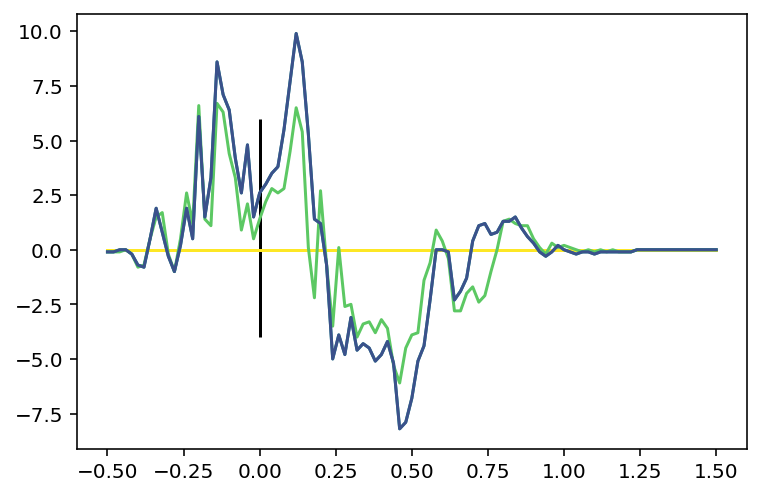

In [99]:
cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet2))
#bet = grab_persistence_bd_nc(trajs[:1])
for i, b in enumerate(bet2):
    plt.plot(np.linspace(-.5,1.5,101), b-bet2[0], color=cmap(norm(i)))
plt.vlines(0,-4,6, linestyles="-")

Text(0.5, 0, 'time to memory (cycles)')

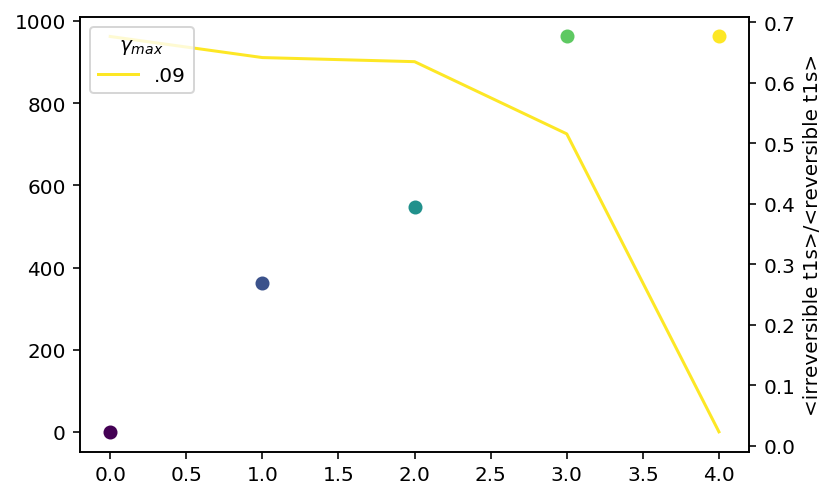

In [242]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet)-1)
#bet = grab_persistence_bd_nc(trajs[:1])
fig, ax1 = plt.subplots()
for i, b in enumerate(bet):
    plt.plot(i, np.sum(np.square(b-bet[0])), 'o', color=cmap(norm(i)))
#plt.plot(bet_init[0])
ax2 = ax1.twinx()
cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=0, vmax=len(revs2)-1)
for idx, (r, i, lab) in enumerate(zip(revs2, irrevs2, labels4)):
    #print(i)
    l = '.'+lab.split('.')[-2]
    plt.plot(np.arange(len(i)), i/(i+r), label=l, color=cmap(norm(idx)))
plt.legend(title=r"$\gamma_{max}$", loc="upper left")
plt.ylabel("<irreversible t1s>/<reversible t1s>")
plt.xlabel("time to memory (cycles)")

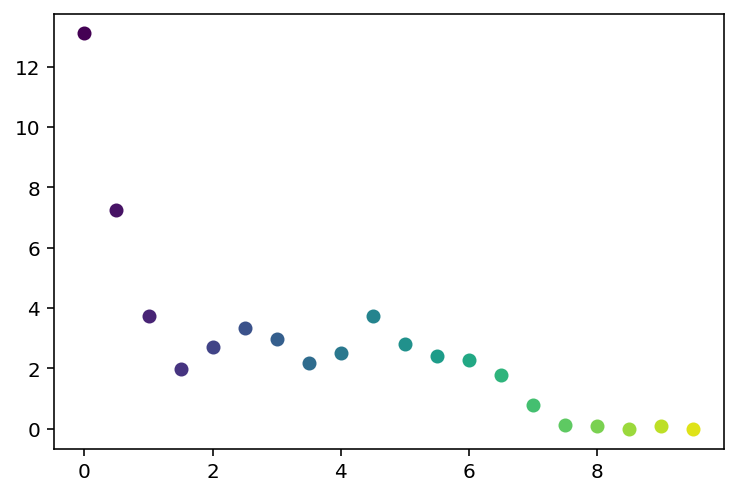

In [189]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet))
#bet = grab_persistence_bd_nc(trajs[:1])

for i, b in enumerate(bet):
    plt.plot(i/2, np.sum(np.square(b-bet[-1]))/len(b), 'o', color=cmap(norm(i)))
#plt.plot(bet_init[0])

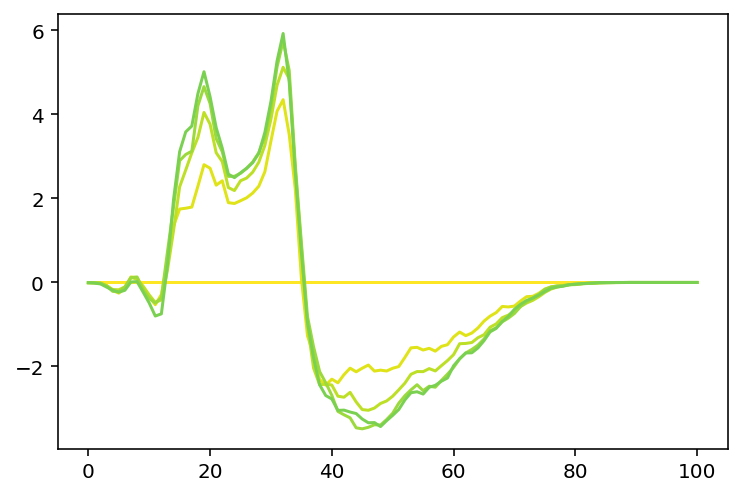

In [80]:
cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet))
#bet = grab_persistence_bd_nc(trajs[:1])
for i, b in enumerate(bet_forward):
    plt.plot(b-bet_init[0], color=cmap(norm(i)))
    

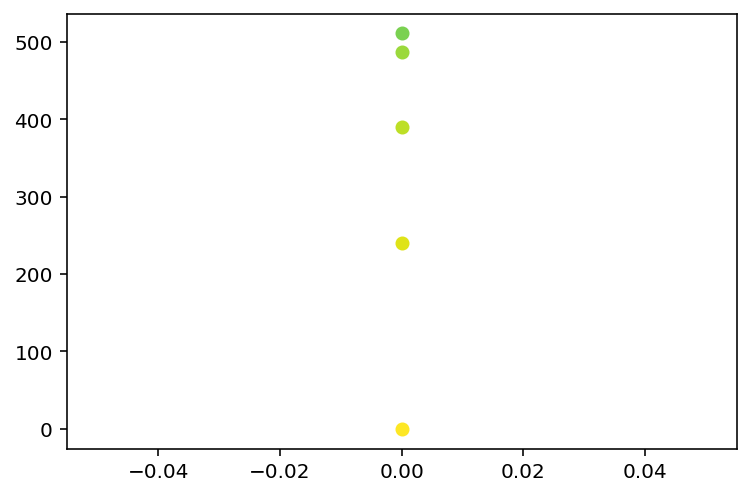

In [87]:
cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=0, vmax=len(bet))
#bet = grab_persistence_bd_nc(trajs[:1])

for i, b in enumerate(bet_forward):
    plt.plot(np.sum(np.square(b-bet_init[0])), 'o', color=cmap(norm(i)))
#plt.plot(bet_init[0])

In [174]:
bds = grab_persistence_bd_0_nc(trajs, limit=1500)

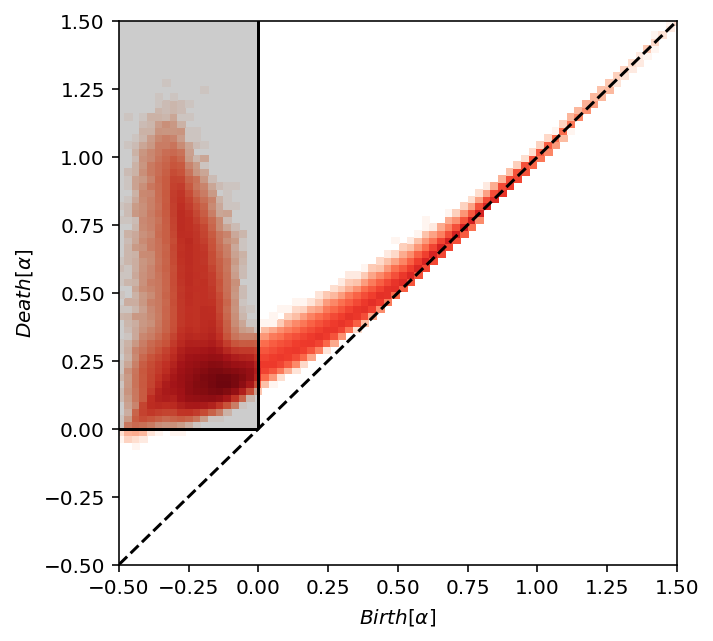

In [200]:
hists_1d(bds.T)

In [199]:
def hists_1d(bd_untrained, samples=1, pc=0, log=True, zoom=False, bins=100):
    
    dim=1
    
    fig = plt.figure(figsize=(5, 5))
    
    ax1 = fig.add_subplot(1,1,1)
    
    ax1.set_ylabel(r"$Death [\alpha]$")
    ax1.set_xlabel(r"$Birth [\alpha]$")
    
    if zoom:
        for ax in [ax1]:
            ax.set_xlim(-0.5,0.1)
            ax.set_ylim(0.0,0.4)
    
    weights1 = np.ones_like(bd_untrained[0])/samples
    
    
    btot = bd_untrained[0]
    
    dtot = bd_untrained[1]
    
    #tmp =  weights2*-1
    
    #wtot = np.concatenate([weights1,tmp])
    
    #print(len(weights1), len(tmp))
    
    #print(len(btot),len(dtot),len(wtot))
    
    (hist, xedges, yedges) = np.histogram2d(bd_untrained[0], bd_untrained[1], weights=weights1, bins=bins, normed=False)

#     (hist, xedges, yedges) = np.histogram2d(np.log10(basin_pers), np.log10(crack_pers), bins=nbins,
#                                            range=[[np.log10(xmin), np.log10(xmax)], [np.log10(ymin), np.log10(ymax)]])

    hist = ma.masked_equal(hist, 0.0)

    #cmap = plt.get_cmap('viridis')#plt.cm.Reds
    cmap = plt.cm.Reds
    if log:
        norm = mpl.colors.LogNorm(vmin=np.min(np.abs(hist)), vmax=np.max(np.abs(hist)))
    else:
        norm = cm.colors.Normalize(vmin=np.min(np.abs(hist)), vmax=np.max(np.abs(hist)))
    smap = cm.ScalarMappable(norm=norm, cmap=cmap)

    X, Y = np.meshgrid(xedges, yedges)
#     X, Y = np.meshgrid(10**xedges, 10**yedges)
    im = ax1.pcolormesh(X, Y, hist.T, cmap=cmap, norm=norm)
    if dim > 0:
        ax1.plot(np.linspace(-1,2,100), np.linspace(-1,2,100), 'k--')
    #fig.colorbar(im, ax=ax1)
    #ax1.pcolormesh(X, Y, hist.T, cmap=cmap, norm=norm)
    
    #******************ax1.hist2d(bd_untrained[0], bd_untrained[1], bins=50, weights=weights1)
    xlim = plt.xlim()[0]
    ylim = plt.ylim()[1]
    plt.vlines(0,0,ylim)
    plt.hlines(0,xlim,0)
    
    plt.fill([xlim,0,0,xlim], [0,0,ylim,ylim], 'k', alpha=0.2)
    
    plt.xlim(-.5,1.5)
    plt.ylim(-.5,1.5)
    
    return
    

In [173]:
bds.shape

(7660, 2)

In [170]:
#new bd persistence curves
def grab_persistence_bd_0_nc(trajs, limit=-1):
    
    bds = []
    for idx, t in enumerate(trajs):
        if idx == limit:
            break
        g2 = glob.glob(t+"/other/phom/*_bd.npz")
        sorter = [int(g.split('/')[-1].replace("_bd.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        bds.append(np.load(ng2[0])['bd'])
    bds = ncat(bds)
    return bds

In [88]:
#qk distribution final initial
def grab_qk_distribution_nc(trajs, bins=np.linspace(-4,4,401), limit=-1):
    qk_i = []
    qk_f = []
    for idx, t in enumerate(trajs):
        if idx == limit:
            break
        g2 = glob.glob(t+"/other/voro/*_qks.npz")
        sorter = [int(g.split('/')[-1].replace("_qks.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        qk_i.append(-1*np.load(ng2[0])['qks'])
        qk_f.append(-1*np.load(ng2[-1])['qks'])
    H_i, _ = np.histogram(ncat(qk_i), bins=bins, normed=True)
    H_f, _ = np.histogram(ncat(qk_f), bins=bins, normed=True)
    return H_i, H_f, (bins+np.roll(bins, -1))[:-1]/2

def grab_qk_dist_gamma_nc(dirs, bins=np.linspace(-4,4,401), limit=-1):
    his = []
    hfs = []
    labels = []
    
    for d in dirs:
        label=d.strip('/').split('/')[-1]
        labels.append(label)
        trajs = glob.glob(pjoin(d,'*[!.nc]'))
        hi, hf, x = grab_qk_distribution_nc(trajs, bins=bins, limit=limit)
        his.append(hi)
        hfs.append(hf)
    return his, hfs, labels, x


def grab_qk_var_skew_nc(trajs, limit=-1):
    qk_i = []
    qk_f = []
    qk_vi = []
    qk_vf = []
    qk_si = []
    qk_sf = []
    for idx, t in enumerate(trajs):
        if idx == limit:
            break
        g2 = glob.glob(t+"/other/voro/*_qks.npz")
        sorter = [int(g.split('/')[-1].replace("_qks.npz","")) for g in g2]
        nsort, ng2 = zip(*sorted(zip(sorter, g2)))
        qk_i.append(-1*np.load(ng2[0])['qks'])
        qk_f.append(-1*np.load(ng2[-1])['qks'])
    #H_i, _ = np.histogram(ncat(qk_i), bins=bins, normed=True)
    #H_f, _ = np.histogram(ncat(qk_f), bins=bins, normed=True)
    qk_i = ncat(qk_i)
    qk_f = ncat(qk_f)
    qk_vi = np.var(qk_i)
    qk_vf = np.var(qk_f)
    qk_si = scipy.stats.skew(qk_i)
    qk_sf = scipy.stats.skew(qk_f)
    return qk_vi, qk_vf, qk_si, qk_sf
        
def grab_qk_var_skew_gamma_nc(dirs, bins=np.linspace(-4,4,401), limit=-1):
    vis = []
    vfs = []
    sis = []
    sfs = []
    labels = []
    
    for d in dirs:
        label=d.strip('/').split('/')[-1]
        labels.append(label)
        trajs = glob.glob(pjoin(d,'*[!.nc]'))
        vi, vf, si, sf = grab_qk_var_skew_nc(trajs, limit=limit)
        vis.append(vi)
        vfs.append(vf)
        sis.append(si)
        sfs.append(sf)
    return vis, vfs, sis, sfs, labels

In [75]:
dirs = glob.glob('/data1/shared/igraham/datasets/new_memory/256.0?.04')
his, hfs, labels, x = grab_qk_dist_gamma_nc(dirs, limit=1500)

<ipython-input-71-b3b6c23f1b92>:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H_i, _ = np.histogram(ncat(qk_i), bins=bins, normed=True)
<ipython-input-71-b3b6c23f1b92>:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H_f, _ = np.histogram(ncat(qk_f), bins=bins, normed=True)


In [73]:
labels

['256.01.04',
 '256.02.04',
 '256.03.04',
 '256.04.04',
 '256.05.04',
 '256.06.04',
 '256.07.04',
 '256.08.04',
 '256.09.04']

import seaborn as sns

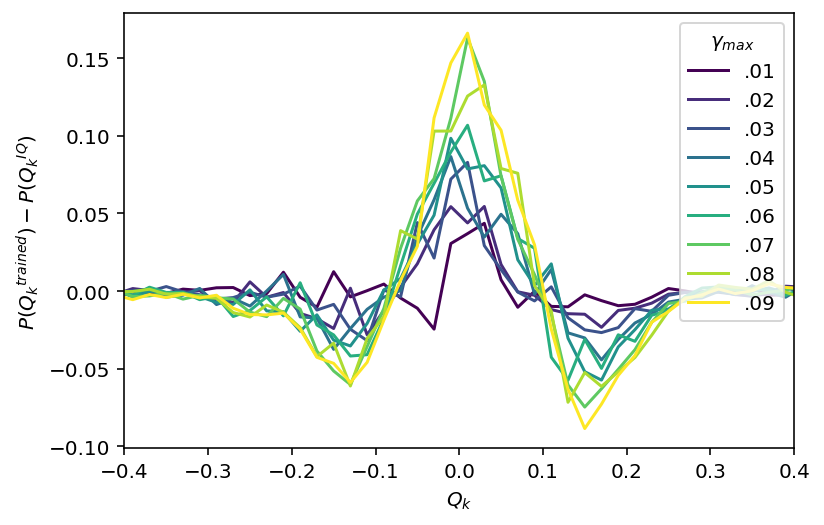

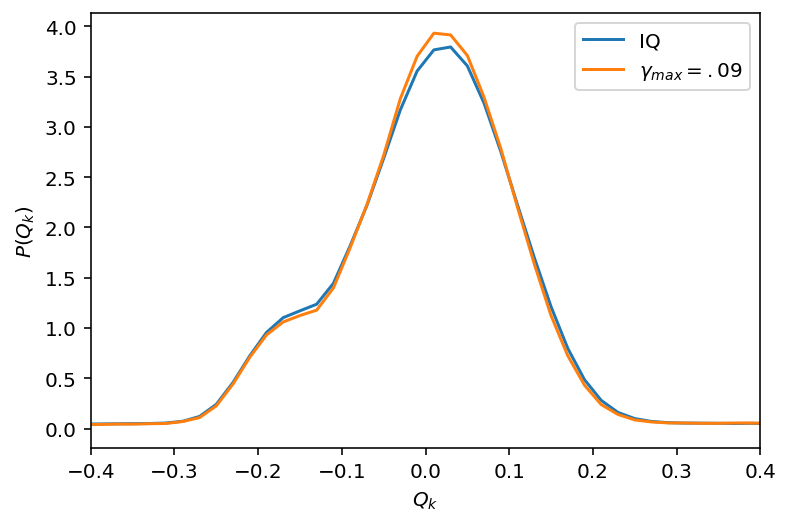

In [86]:
mhis = np.mean(his, axis=0)
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=len(hfs)-1)
for idx, (hf, lab) in enumerate(zip(hfs, labels)):
    l = '.'+lab.split('.')[-2]
    plt.plot(x, hf - mhis, color=cmap(norm(idx)), label=l)
plt.legend(title=r"$\gamma_{max}$", loc='upper right')
plt.ylabel(r"$P({Q_k}^{trained}) - P({Q_k}^{IQ})$")
plt.xlabel(r"$Q_k$")
plt.xlim(-.4,.4)
plt.figure()
plt.plot(x, mhis, label="IQ")
plt.plot(x, hfs[-1], label=r'$\gamma_{max}=.09$')
plt.xlim(-.4,.4)
plt.ylabel(r"$P({Q_k})$")
plt.xlabel(r"$Q_k$")
plt.legend(loc='upper right')

In [89]:
dirs = glob.glob('/data1/shared/igraham/datasets/new_memory/256.0?.04')
vis, vfs, sis, sfs, labels2 = grab_qk_var_skew_gamma_nc(dirs, limit=1500)
x2 = [float('.'+lab.split('.')[-2]) for lab in labels2]

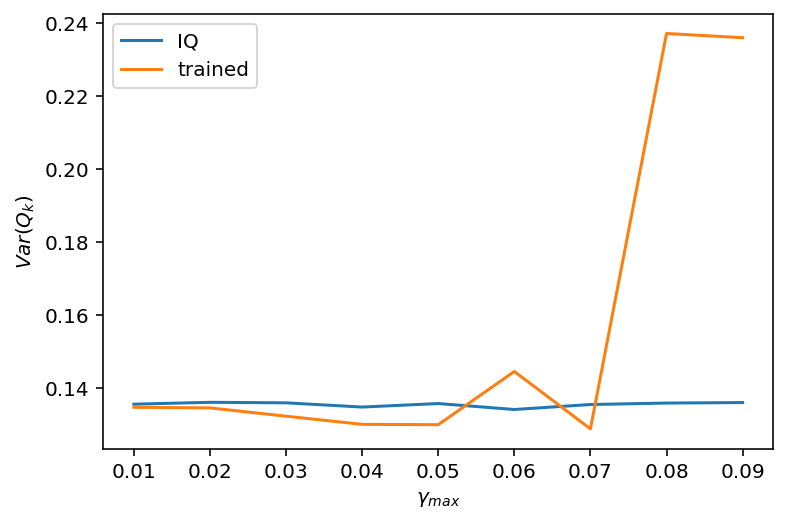

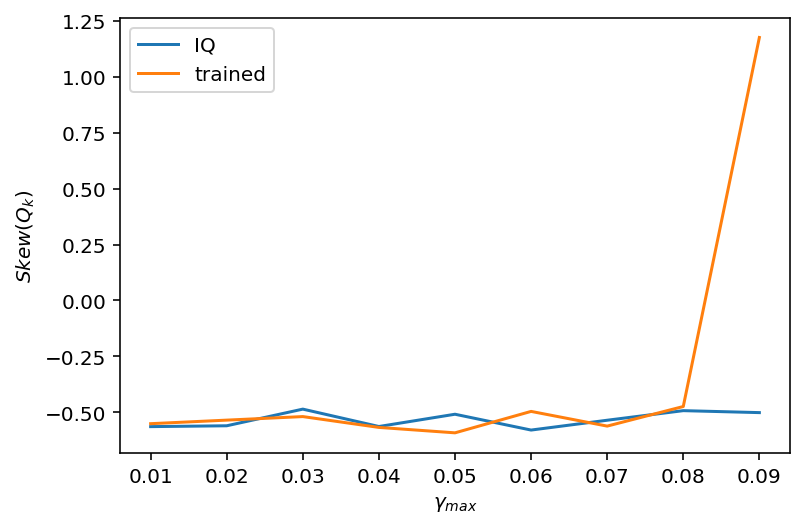

In [102]:
plt.figure()
plt.plot(x2, vis, label="IQ")
plt.plot(x2, vfs, label="trained")
plt.xlabel(r"$\gamma_{max}$")
plt.ylabel(r"$Var(Q_k)$")
plt.legend()

plt.figure()
plt.plot(x2, sis, label="IQ")
plt.plot(x2, sfs, label="trained")
plt.ylabel(r"$Skew(Q_k)$")
plt.xlabel(r"$\gamma_{max}$")
plt.legend()

In [ ]:
#particle qk statistics

In [ ]:
#persistent homology movie
def persistent_homology_movie_hoomd(traj):
    

In [ ]:
#distribution of dealuney triangle shapes

In [ ]:
#movie of packing being sheared, and t1 events poping in out (I already have these)

In [ ]:
#persistence curve calculation example plot
def pcurve_example_calc(bd, t=1, lim=(-.5,1.5)):
    

In [ ]:
#quasilocalized modes